# 4. Question 4 : Bidirectional Associative Memory(BAM)

In [3]:
import numpy as np
import pandas as pd

In [79]:
C = np.array([
    -1,1,1,
    1,-1,-1,
    1,-1,-1,
    1,-1,-1,
    -1,1,1,
])

C_code = np.array([-1,-1,-1])

E = np.array([
    1,1,1,
    1,-1,-1,
    1,1,-1,
    1,-1,-1,
    1,1,1,
])

E_code = np.array([-1,-1,1])


R = np.array([
    1,1,1,
    1,-1,1,
    1,1,1,
    1,1,-1,
    1,-1,1,
])

R_code = np.array([-1,1,-1])

O = np.array([
    -1,1,-1,
    1,-1,1,
    1,-1,1,
    1,-1,1,
    -1,1,-1,
])

O_code = np.array([-1,1,1])


F = np.array([
    1,1,1,
    1,-1,-1,
    1,1,-1,
    1,-1,-1,
    1,-1,-1,
])

F_code = np.array([1,-1,-1])

P = np.array([
    1,1,1,
    1,-1,1,
    1,1,1,
    1,-1,-1,
    1,-1,-1,
])

P_code = np.array([1,-1,-1])

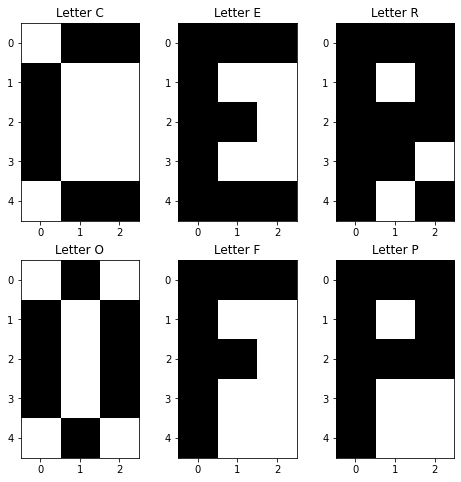

In [5]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(2, 3, 1)
plt.imshow(C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
fig.add_subplot(2, 3, 2)
plt.imshow(E.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter E')
fig.add_subplot(2, 3, 3)
plt.imshow(R.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter R')

fig.add_subplot(2, 3, 4)
plt.imshow(O.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter O')
fig.add_subplot(2, 3, 5)
plt.imshow(F.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter F')
fig.add_subplot(2, 3, 6)
plt.imshow(P.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter P')
plt.show()

In [6]:
class BAM() :
    
    def __init__(self, in_features, out_features, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.out_features = out_features
        # Initialize Weights & Biases
        self.init_wad()
        
    # Initialize Weights with 0
    def init_wad(self) :
        self.weights = np.zeros(shape=(self.in_features*self.out_features,)).reshape(-1,self.out_features)
    
    #Activation Function bipolar
    def h(self,num,threshold = 0.25) :
        if num > threshold :
            return 1
        elif num < threshold:
            return -1
        else :
            return threshold

    def forward(self, x):
        net = np.matmul(x,self.weights)
        prediction = pd.Series(net)
        prediction = prediction.apply(self.h).values
        return prediction
    
    def backward(self,y) :
        net = np.matmul(y,self.weights.T)
        prediction = pd.Series(net)
        prediction = prediction.apply(self.h).values
        return prediction

    def calculate_new_weights(self,x,y) :
        new_weight = np.matmul(x.reshape(-1,1),y.reshape(1,-1))
        self.weights = self.weights + new_weight
        
    def initialize_weights(self,X_train,y_train,epochs = 1) :
        for epoch in range(0,epochs):
            
            for i in range(len(X_train)) :
                # Backpropagation
                self.calculate_new_weights(X_train[i],y_train[i])

In [7]:
model = BAM(in_features=15,out_features=3)

# Part 1

In [8]:
X_train = np.concatenate([C.reshape(1,15),E.reshape(1,15), R.reshape(1,15)], axis=0)
y_train = np.concatenate([C_code.reshape(1,3),E_code.reshape(1,3), R_code.reshape(1,3)], axis=0)

In [9]:
model.initialize_weights(X_train, y_train,epochs=1)

In [10]:
model.weights

array([[-1.,  1.,  1.],
       [-3., -1., -1.],
       [-3., -1., -1.],
       [-3., -1., -1.],
       [ 3.,  1.,  1.],
       [ 1.,  3., -1.],
       [-3., -1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  3., -1.],
       [-3., -1., -1.],
       [ 1.,  3., -1.],
       [ 3.,  1.,  1.],
       [-1.,  1.,  1.],
       [-1., -3.,  1.],
       [-3., -1., -1.]])

# Part 2

## Forward
The trained model is able to classify C and R perfectly. The model mistakes E with C since E is **quite similar** to C.
So the forward accuracy for training data set is 2/3 = 66%.

In [11]:
y_1 = model.forward(X_train[0])
y_2 = model.forward(X_train[1])
y_3 = model.forward(X_train[2])

print('Input : C Output :',y_1)
print('Input : E Output :',y_2)
print('Input : R Output :',y_3)

Input : C Output : [-1 -1 -1]
Input : E Output : [-1 -1 -1]
Input : R Output : [-1  1 -1]


## Backward
The model is able to regenerate each training input with corresponding code. So the backward accuracy is 100% for training data set.

In [12]:
x_1 = model.backward(y_train[0])
x_2 = model.backward(y_train[1])
x_3 = model.backward(y_train[2])


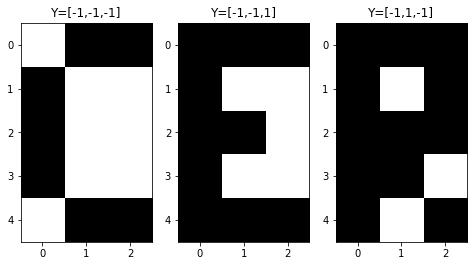

In [13]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(x_1.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Y=[-1,-1,-1]')
fig.add_subplot(1, 3, 2)
plt.imshow(x_2.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Y=[-1,-1,1]')
fig.add_subplot(1, 3, 3)
plt.imshow(x_3.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Y=[-1,1,-1]')
plt.show()

# Part 3
The average accuracy of this model with 40% noise applied to each input in 100 runs is 51.66%.

In [14]:
import math
def noise_producer(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      if with_noise.flat[random_pixel] == -1 :
        with_noise.flat[random_pixel] = 1
      else:
        with_noise.flat[random_pixel] = -1
    
    return with_noise

In [42]:
correct = 0
total = 0
for iteration in range(0,100) :
    total += 3
    # 40% Noise
    C_noise = noise_producer(C,0.4)
    E_noise = noise_producer(E,0.4)
    R_noise = noise_producer(R,0.4)

    X_train_noised = np.concatenate([C_noise.reshape(1,15),E_noise.reshape(1,15), R_noise.reshape(1,15)], axis=0)
    y_train = np.concatenate([C_code.reshape(1,3),E_code.reshape(1,3), R_code.reshape(1,3)], axis=0)

    for i in range(len(X_train_noised)) :
      prediction = model.forward(X_train_noised[i])    
      if np.array_equal(prediction, y_train[i]):
        correct += 1

In [45]:
print("Model's accuracy with 40% noised in 100 runs: ",correct*100/total)    

Model's accuracy with 40% noised in 100 runs:  51.666666666666664


# Part 4
The memory or storage capacity of BAM may be given as ${\displaystyle \min(m,n)}$, where ${\displaystyle n}$ is the number of units in the X layer and ${\displaystyle m}$ is the number of units in the Y layer.
In this problem, n and m are 15 and 3 respectively. So the maximum number of patters that can be stored in this model is **3**.  

# Part 5

In [96]:
model2 = BAM(in_features=15,out_features=3)

In [97]:
X_train = np.concatenate([C.reshape(1,15),E.reshape(1,15), R.reshape(1,15), O.reshape(1,15), F.reshape(1,15), P.reshape(1,15)], axis=0)
y_train = np.concatenate([C_code.reshape(1,3),E_code.reshape(1,3), R_code.reshape(1,3),O_code.reshape(1,3),F_code.reshape(1,3), P_code.reshape(1,3)], axis=0)

In [98]:
model2.initialize_weights(X_train, y_train)

In [99]:
model2.weights

array([[ 2., -2., -2.],
       [-2., -2., -2.],
       [ 0., -4., -4.],
       [-2., -2., -2.],
       [ 2.,  2.,  2.],
       [ 0.,  4.,  0.],
       [-2., -2., -2.],
       [ 2., -2., -2.],
       [ 0.,  4.,  0.],
       [-2., -2., -2.],
       [ 0.,  4.,  0.],
       [ 0.,  4.,  4.],
       [ 2., -2., -2.],
       [-4.,  0.,  4.],
       [-4.,  0.,  0.]])

## Forward
The trained model is able to classify C, O and F  perfectly. But other letters are mistaken with letter C.
So the forward accuracy for training data set is 3/6 = 50%.

In [100]:
y_1 = model2.forward(X_train[0])
y_2 = model2.forward(X_train[1])
y_3 = model2.forward(X_train[2])
y_4 = model2.forward(X_train[3])
y_5 = model2.forward(X_train[4])
y_6 = model2.forward(X_train[5])

In [101]:

print('Input : C Output :',y_1)
print('Input : E Output :',y_2)
print('Input : R Output :',y_3)

print('Input : O Output :',y_4)
print('Input : F Output :',y_5)
print('Input : P Output :',y_6)

Input : C Output : [-1 -1 -1]
Input : E Output : [-1 -1 -1]
Input : R Output : [-1 -1 -1]
Input : O Output : [-1  1  1]
Input : F Output : [ 1 -1 -1]
Input : P Output : [ 1 -1 -1]


## Backward
The model is able to regenerate letter F only in backward direction. So the backward accuracy is 1/6 = 16% for training data set.

In [102]:

x_1 = model2.backward(y_train[0])
x_2 = model2.backward(y_train[1])
x_3 = model2.backward(y_train[2])
x_4 = model2.backward(y_train[3])
x_5 = model2.backward(y_train[4])
x_6 = model2.backward(y_train[5])


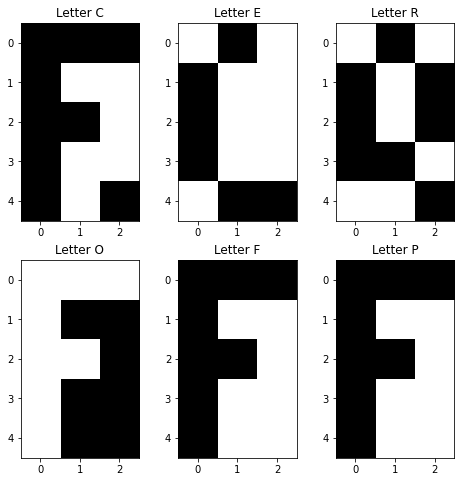

In [103]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(2, 3, 1)
plt.imshow(x_1.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
fig.add_subplot(2, 3, 2)
plt.imshow(x_2.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter E')
fig.add_subplot(2, 3, 3)
plt.imshow(x_3.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter R')

fig.add_subplot(2, 3, 4)
plt.imshow(x_4.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter O')
fig.add_subplot(2, 3, 5)
plt.imshow(x_5.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter F')
fig.add_subplot(2, 3, 6)
plt.imshow(x_6.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter P')
plt.show()